In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

: 

In [ ]:
ppo_data = np.load('eval_results/ppo/evaluations.npz')
a2c_data = np.load('eval_results/a2c/evaluations.npz')
dqn_data = np.load('eval_results/dqn/evaluations.npz')

: 

In [ ]:
ppo_df = pd.read_csv('test_logs/ppo.csv')
a2c_df = pd.read_csv('test_logs/a2c.csv')
dqn_df = pd.read_csv('test_logs/dqn.csv')
greedy_df = pd.read_csv('test_logs/greedy.csv')
random_df = pd.read_csv('test_logs/random.csv')

: 

In [109]:
ppo_df["reward"] = ppo_df['travel_reward'] + ppo_df['ride_reward']
a2c_df["reward"] = a2c_df['travel_reward'] + a2c_df['ride_reward']
dqn_df["reward"] = dqn_df['travel_reward'] + dqn_df['ride_reward']
random_df["reward"] = random_df['travel_reward'] + random_df['ride_reward']
greedy_df["reward"] = greedy_df['travel_reward'] + greedy_df['ride_reward']

ppo_df["total_duration"] = ppo_df['travel_duration'] + ppo_df['ride_duration'] + ppo_df['wait_duration']
a2c_df["total_duration"] = a2c_df['travel_duration'] + a2c_df['ride_duration'] + a2c_df['wait_duration']
dqn_df["total_duration"] = dqn_df['travel_duration'] + dqn_df['ride_duration'] + dqn_df['wait_duration']
random_df["total_duration"] = random_df['travel_duration'] + random_df['ride_duration'] + random_df['wait_duration']
greedy_df["total_duration"] = greedy_df['travel_duration'] + greedy_df['ride_duration'] + greedy_df['wait_duration']

ppo_df["valid_ride_duration"] = (ppo_df['ride_reward'] > 0) * ppo_df['ride_duration']
ppo_df["invalid_ride_duration"] = ppo_df['ride_duration'] - ppo_df["valid_ride_duration"]
a2c_df["valid_ride_duration"] = (a2c_df['ride_reward'] > 0) * a2c_df['ride_duration']
a2c_df["invalid_ride_duration"] = a2c_df['ride_duration'] - a2c_df["valid_ride_duration"]
dqn_df["valid_ride_duration"] = (dqn_df['ride_reward'] > 0) * dqn_df['ride_duration']
dqn_df["invalid_ride_duration"] = dqn_df['ride_duration'] - dqn_df["valid_ride_duration"]
random_df["valid_ride_duration"] = (random_df['ride_reward'] > 0) * random_df['ride_duration']
random_df["invalid_ride_duration"] = random_df['ride_duration'] - random_df["valid_ride_duration"]
greedy_df["valid_ride_duration"] = (greedy_df['ride_reward'] > 0) * greedy_df['ride_duration']
greedy_df["invalid_ride_duration"] = greedy_df['ride_duration'] - greedy_df["valid_ride_duration"]


: 

In [146]:
dqn_avg = dqn_df.groupby('current_date')['reward'].sum().mean()
a2c_avg = a2c_df.groupby('current_date')['reward'].sum().mean()
ppo_avg = ppo_df.groupby('current_date')['reward'].sum().mean()
random_avg = random_df.groupby('current_date')['reward'].sum().mean()
greedy_avg = greedy_df.groupby('current_date')['reward'].sum().mean()

: 

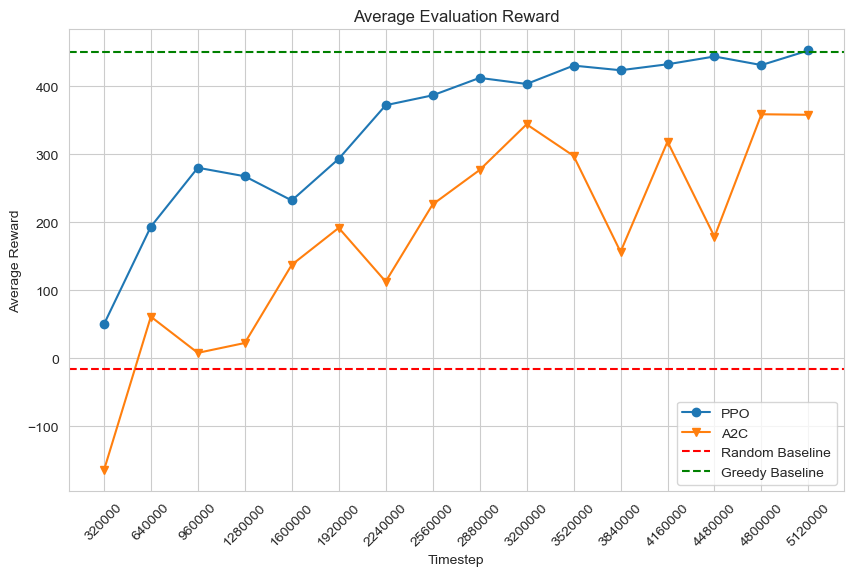

In [87]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.ticklabel_format(useOffset=False)
plt.plot(ppo_data["timesteps"], ppo_data["results"].mean(axis=1), label="PPO", marker='o')
plt.plot(a2c_data["timesteps"], a2c_data["results"].mean(axis=1), label="A2C", marker='v')
plt.xticks(ppo_data["timesteps"], labels=ppo_data["timesteps"], rotation=45)

# draw random and greedy baselines
plt.axhline(y=random_avg, color='r', linestyle='--', label="Random Baseline")
plt.axhline(y=greedy_avg, color='g', linestyle='--', label="Greedy Baseline")

plt.xlabel("Timestep")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Average Evaluation Reward")
plt.show()

In [ ]:
ppo_train_df = pd.read_csv('monitor_logs/ppo/train.monitor.csv', skiprows=1)
a2c_train_df = pd.read_csv('monitor_logs/a2c/train.monitor.csv', skiprows=1)
dqn_train_df = pd.read_csv('monitor_logs/dqn/train.monitor.csv', skiprows=1)

: 

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ppo_train_df["r"], label="PPO", alpha=0.8)
plt.plot(a2c_train_df["r"], label="A2C", alpha=0.8)
plt.legend()
plt.xlabel("Training Episode")
plt.ylabel("Episode Reward")
plt.title("Training Reward Over Time")
plt.show()

: 

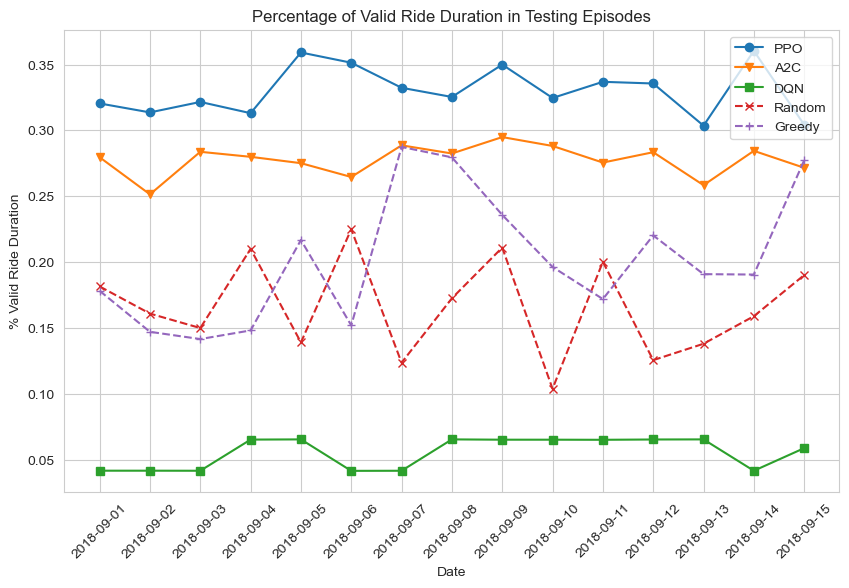

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(ppo_df.groupby('current_date').apply(lambda x: x['valid_ride_duration'].sum() / x['total_duration'].sum()), label="PPO", marker='o')
plt.plot(a2c_df.groupby('current_date').apply(lambda x: x['valid_ride_duration'].sum() / x['total_duration'].sum()), label="A2C", marker='v')
plt.plot(dqn_df.groupby('current_date').apply(lambda x: x['valid_ride_duration'].sum() / x['total_duration'].sum()), label="DQN", marker='s')
plt.plot(random_df.groupby('current_date').apply(lambda x: x['valid_ride_duration'].sum() / x['total_duration'].sum()), label="Random", marker='x', linestyle='--')
plt.plot(greedy_df.groupby('current_date').apply(lambda x: x['valid_ride_duration'].sum() / x['total_duration'].sum()), label="Greedy", marker='+', linestyle='--')
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("% Valid Ride Duration")
plt.legend()

plt.title("Percentage of Valid Ride Duration in Testing Episodes")
plt.show()


<Figure size 1000x600 with 0 Axes>

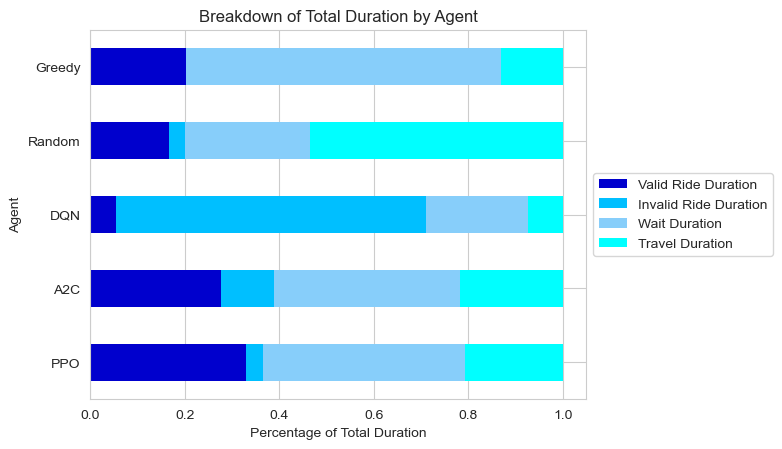

In [140]:
# plot horizontal stacked bar chart comparing different agents
arr = np.array([
    ppo_df[['valid_ride_duration', 'invalid_ride_duration', 'wait_duration', 'travel_duration']].sum().values,
    a2c_df[['valid_ride_duration', 'invalid_ride_duration', 'wait_duration', 'travel_duration']].sum().values,
    dqn_df[['valid_ride_duration', 'invalid_ride_duration', 'wait_duration', 'travel_duration']].sum().values,
    random_df[['valid_ride_duration', 'invalid_ride_duration', 'wait_duration', 'travel_duration']].sum().values,
    greedy_df[['valid_ride_duration', 'invalid_ride_duration', 'wait_duration', 'travel_duration']].sum().values
])

# # normalize by total duration
arr = arr / arr.sum(axis=1)[:, np.newaxis]

breakdown_df = pd.DataFrame(arr, columns=['Valid Ride Duration', 'Invalid Ride Duration', 'Wait Duration', 'Travel Duration'])
breakdown_df.index = ['PPO', 'A2C', 'DQN', 'Random', 'Greedy']

# plot stacked bar chart, no white space between bars
plt.figure(figsize=(10, 6))
breakdown_df.plot.barh(stacked=True, color=['mediumblue', 'deepskyblue', 'lightskyblue', 'cyan'], edgecolor='none')

plt.ylabel("Agent")
plt.xlabel("Percentage of Total Duration")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Breakdown of Total Duration by Agent")
plt.show()

Text(0.5, 1.0, 'Agent Reward in Testing Episodes')

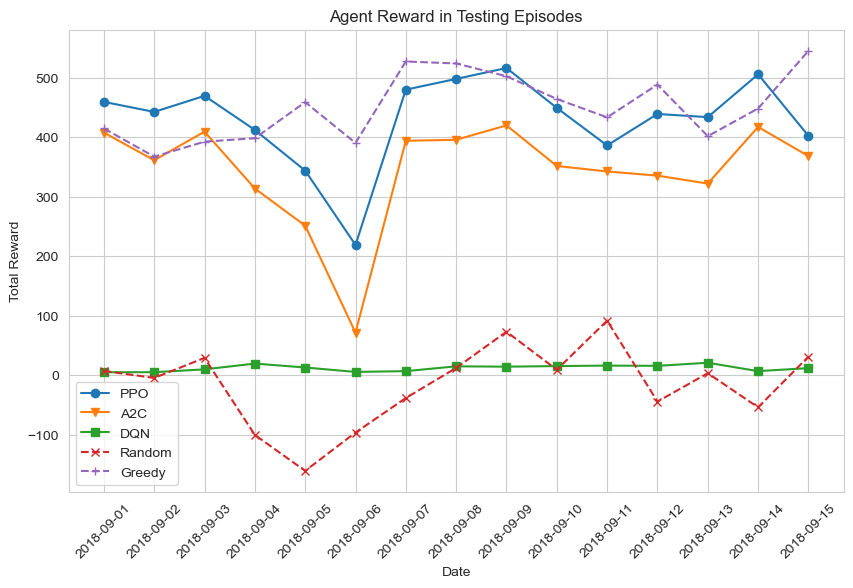

In [145]:
plt.figure(figsize=(10, 6))
plt.plot(ppo_df.groupby('current_date')["reward"].sum(), label="PPO", marker='o')
plt.plot(a2c_df.groupby('current_date')["reward"].sum(), label="A2C", marker='v')
plt.plot(dqn_df.groupby('current_date')["reward"].sum(), label="DQN", marker='s')
plt.plot(random_df.groupby('current_date')["reward"].sum(), label="Random", marker='x', linestyle='--')
plt.plot(greedy_df.groupby('current_date')["reward"].sum(), label="Greedy", marker='+', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Total Reward")
plt.legend()
plt.title("Agent Reward in Testing Episodes")

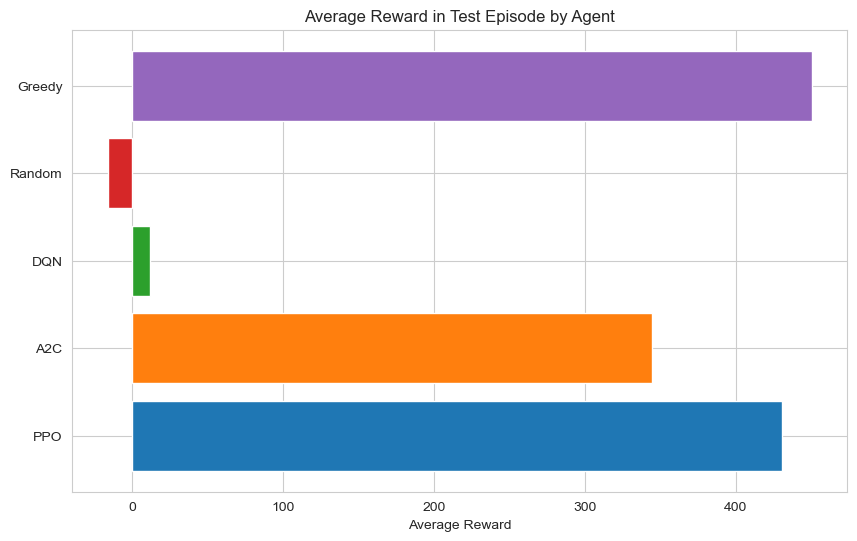

In [155]:
plt.figure(figsize=(10, 6))

plt.barh(['PPO', 'A2C', 'DQN', 'Random', 'Greedy'], [ppo_avg, a2c_avg, dqn_avg, random_avg, greedy_avg], color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.xlabel("Average Reward")
plt.title("Average Reward in Test Episode by Agent")
plt.show()